
# 02 – Simulation des modèles (GBM, Heston, Variance Gamma)

Ce notebook illustre la **simulation de trajectoires** sous différents modèles :
- Mouvement brownien géométrique (GBM) ;
- Modèle de Heston (volatilité stochastique) ;
- Modèle de Variance Gamma (processus de Lév y à sauts).

L'idée est de visualiser les trajectoires, comparer les distributions de rendements
et l'impact des paramètres.


In [4]:

import pathlib, sys
import numpy as np
import matplotlib.pyplot as plt

NOTEBOOK_DIR = pathlib.Path().resolve()
PROJECT_ROOT = NOTEBOOK_DIR.parent

if str(PROJECT_ROOT / "src") not in sys.path:
    sys.path.append(str(PROJECT_ROOT / "src"))

from models.gbm import GBM
from models.heston import Heston
from models.variance_gamma import VarianceGamma  # adapter le nom exact si besoin



## 1. Paramètres de simulation

On fixe un horizon $T$, un nombre de pas $N$ et un nombre de trajectoires $M$.


In [5]:

T = 1.0    # horizon en années
N = 252    # nombre de pas (jours de bourse)
M = 1000   # nombre de trajectoires

S0 = 100.0
mu = 0.05
sigma = 0.2

rng_seed = 42



## 2. Simulation GBM

Le GBM vérifie
$$ dS_t = \mu S_t\,dt + \sigma S_t\,dW_t. $$


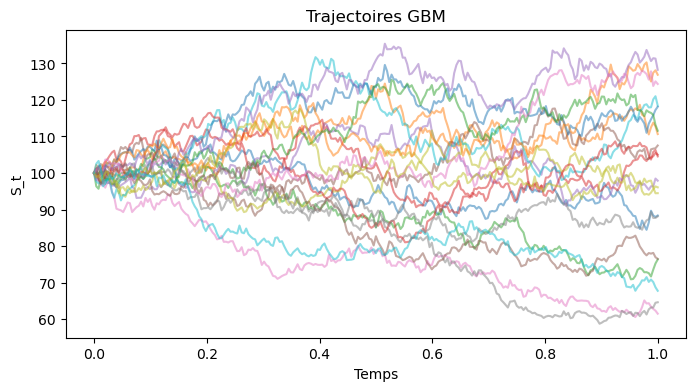

In [6]:

gbm_model = GBM(mu=mu, sigma=sigma, S0=S0)  # adapter au constructeur réel
t_gbm, paths_gbm = gbm_model.simulate(T=T, N=N, M=M, random_state=rng_seed)

# Visualisation de quelques trajectoires
plt.figure(figsize=(8, 4))
for i in range(20):
    plt.plot(t_gbm, paths_gbm[i], alpha=0.5)
plt.title("Trajectoires GBM")
plt.xlabel("Temps")
plt.ylabel("S_t")
plt.show()



## 3. Simulation Heston

Le modèle de Heston couple le prix $S_t$ et la variance instantanée $v_t$ :
$$ 
  dS_t = \mu S_t\,dt + \sqrt{v_t}\,S_t\,dW_t^S, \qquad
  dv_t = \kappa(\theta - v_t)\,dt + \sigma_v \sqrt{v_t}\,dW_t^v.
$$


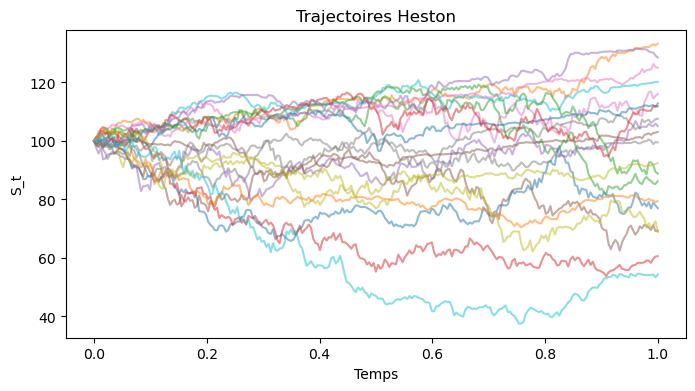

In [9]:

heston_params = dict(
    kappa=2.0,
    theta=0.04,
    xi=0.5,    
    rho=-0.7,
    v0=0.04,
    S0=S0,
    mu=mu,
)


heston_model = Heston(**heston_params)  # adapter au constructeur réel  
t_h, paths_h = heston_model.simulate(T=T, N=N, M=M, random_state=rng_seed)

plt.figure(figsize=(8, 4))
for i in range(20):
    plt.plot(t_h, paths_h[i], alpha=0.5)
plt.title("Trajectoires Heston")
plt.xlabel("Temps")
plt.ylabel("S_t")
plt.show()



## 4. Simulation Variance Gamma

Le modèle Variance Gamma introduit des **sauts** dans les rendements via un processus de Lév y.


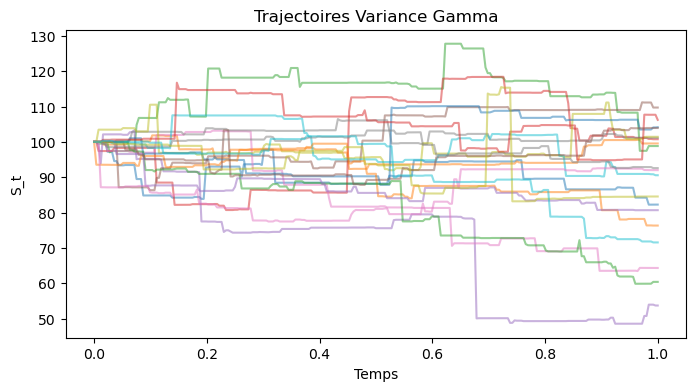

In [10]:

vg_params = dict(
    theta=-0.1,
    sigma=0.2,
    nu=0.2,
    S0=S0,
)

vg_model = VarianceGamma(**vg_params)  # adapter au constructeur réel
t_vg, paths_vg = vg_model.simulate(T=T, N=N, M=M, random_state=rng_seed)

plt.figure(figsize=(8, 4))
for i in range(20):
    plt.plot(t_vg, paths_vg[i], alpha=0.5)
plt.title("Trajectoires Variance Gamma")
plt.xlabel("Temps")
plt.ylabel("S_t")
plt.show()



## 5. Comparaison des distributions de rendements

On compare ici les distributions des rendements sur un pas de temps donné
entre les différents modèles.


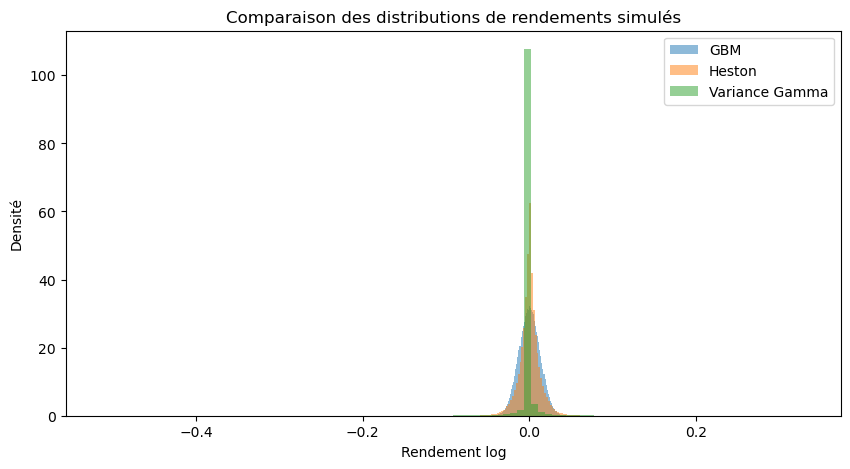

In [11]:

def log_returns_from_paths(paths):
    return np.diff(np.log(paths), axis=1).ravel()

logret_gbm = log_returns_from_paths(paths_gbm)
logret_h = log_returns_from_paths(paths_h)
logret_vg = log_returns_from_paths(paths_vg)

plt.figure(figsize=(10, 5))
bins = 100
plt.hist(logret_gbm, bins=bins, density=True, alpha=0.5, label="GBM")
plt.hist(logret_h,   bins=bins, density=True, alpha=0.5, label="Heston")
plt.hist(logret_vg,  bins=bins, density=True, alpha=0.5, label="Variance Gamma")
plt.legend()
plt.title("Comparaison des distributions de rendements simulés")
plt.xlabel("Rendement log")
plt.ylabel("Densité")
plt.show()



### À analyser dans ce notebook

- Impact des paramètres sur la forme des trajectoires (volatilité, sauts, clustering de volatilité).
- Comparaison des moments empiriques (skewness, kurtosis) avec les prédictions du modèle.
- Lien avec les hypothèses utilisées ensuite pour la valorisation et la VaR/CVaR.
